In [1]:
import torch
from torch import nn
import os
import pandas as pd
from torchvision.io import read_image
import cv2
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Resize, Normalize, Compose
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class DynaSet(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
    
  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = Image.open(img_path)
    # image = read_image(img_path) pytorch/vision#4181
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

transforms_drafts = [
  ToTensor(),
  Resize((25,25)),
] 

transforms = Compose(transforms_drafts)

traind = DynaSet('./dataset/annot.csv', './dataset/',
                 transform=transforms,
                 target_transform=float)

x = torch.stack([i[0] for i in traind])
std, mean = torch.std_mean(x, (0,2,3))
del x  # free memory
print(std, mean)

transforms_drafts.append(Normalize(std=std, mean=mean))

traind = DynaSet('./dataset/annot.csv', './dataset/',
                 transform=transforms,
                 target_transform=float)
traind

tensor([0.2869, 0.2466, 0.2823]) tensor([0.3706, 0.3026, 0.2850])


In [3]:
traind.img_labels[traind.img_labels["label"] == 1]

,file,label
320,pos/puttoleft1.png,1
321,pos/puttoleft2.png,1
322,pos/puttoright1.png,1
323,pos/shift0.png,1
324,pos/shift1.png,1
325,pos/shift2.png,1
326,pos/shift3.png,1
327,pos/shiftwick0.png,1
328,pos/shiftwick1.png,1
329,pos/shiftwick2.png,1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


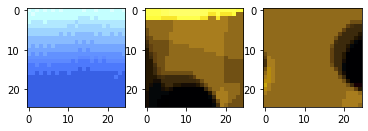

In [4]:
plt.subplot(131)
plt.imshow(np.transpose(traind[219][0].numpy()/2+.5, (1,2,0)))
plt.subplot(132)
plt.imshow(np.transpose(traind[126][0].numpy()/2+.5, (1,2,0)))
plt.subplot(133)
plt.imshow(np.transpose(traind[319][0].numpy()/2+.5, (1,2,0)))

In [5]:
trainl = DataLoader(traind, batch_size=4, shuffle=True)
trainl

In [6]:
traind.img_labels.count()

file     716
label    716
dtype: int64

In [7]:
class DynaNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc = nn.Sequential(
      nn.Linear(1875, 1000),
      nn.ReLU(),
      nn.Linear(1000, 500),
      nn.ReLU(),
      nn.Linear(500, 1),
    )

  def forward(self, x):
    x = self.flatten(x)
    x = self.fc(x)
    return x
DynaNet()

DynaNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=1875, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=1, bias=True)
  )
)

0/10 0.6071
0/21 0.5672
0/32 0.4819
0/43 0.4361
0/54 0.3858
0/65 0.3327
0/76 0.2767
0/87 0.2299
0/98 0.2126
0/109 0.2187
0/120 0.1571
0/131 0.1791
0/142 0.1818
0/153 0.1702
0/164 0.1087
0/175 0.1584
1/10 0.1229
1/21 0.0968
1/32 0.1903
1/43 0.0613
1/54 0.1616
1/65 0.1948
1/76 0.1030
1/87 0.0903
1/98 0.1516
1/109 0.0802
1/120 0.0520
1/131 0.2108
1/142 0.2344
1/153 0.0950
1/164 0.0364
1/175 0.0405
2/10 0.1146
2/21 0.1228
2/32 0.0862
2/43 0.0804
2/54 0.0727
2/65 0.1063
2/76 0.1090
2/87 0.0322
2/98 0.1173
2/109 0.0257
2/120 0.0967
2/131 0.0383
2/142 0.1854
2/153 0.0517
2/164 0.0330
2/175 0.0346
3/10 0.0237
3/21 0.0512
3/32 0.0192
3/43 0.0834
3/54 0.1171
3/65 0.0696
3/76 0.0746
3/87 0.0316
3/98 0.1118
3/109 0.0739
3/120 0.0730
3/131 0.0193
3/142 0.0606
3/153 0.0268
3/164 0.0213
3/175 0.0195
4/10 0.0139
4/21 0.0649
4/32 0.0324
4/43 0.0184
4/54 0.0154
4/65 0.0121
4/76 0.0096
4/87 0.0309
4/98 0.0177
4/109 0.0422
4/120 0.1027
4/131 0.0353
4/142 0.0123
4/153 0.0332
4/164 0.0415
4/175 0.0464
5/10 

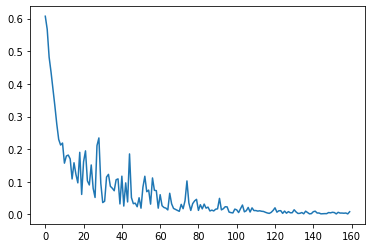

In [8]:
net = DynaNet()
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(net.parameters(), lr=1e-5)

step = 11
running_losses = []
for epoch in range(10):
  running_loss = 0.
  for i, (b, l) in enumerate(trainl):
    net.train()
    optim.zero_grad()
    y = net(b)
    loss = loss_fn(y.squeeze(), l)
    loss.backward()
    optim.step()
    running_loss += loss.item()
    if i % step == step-1:
      running_losses.append(running_loss/step)
      print(f"{epoch}/{i} {running_losses[-1]:.4f}")
      running_loss = 0.
    
plt.plot(running_losses)

(640, 800, 3)

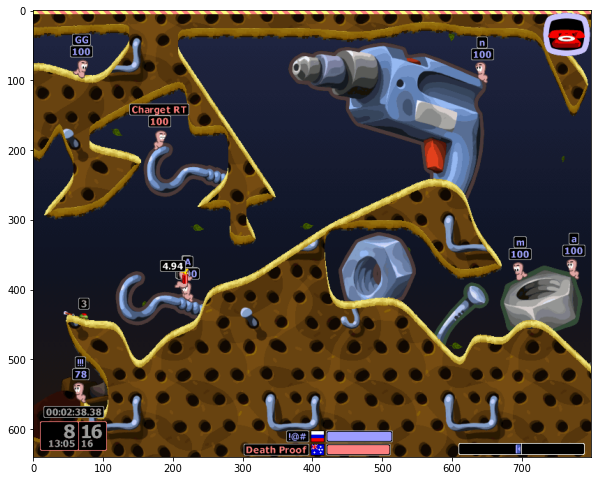

In [9]:
testimg = cv2.cvtColor(cv2.imread("./img/target.png"), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(testimg)
plt.plot()
testimg.shape

In [10]:
kernel = 25
stride = 2
testd = []
for xi in range(0, len(testimg), stride):
  for yi in range(0, len(testimg[xi]), stride):
    padd = np.zeros((kernel,kernel,3), np.uint8)
    targ = testimg[xi:xi+kernel,yi:yi+kernel,:]
    s = targ.shape
    padd[:s[0], :s[1], :] = targ
    testd.append(padd)
len(testd)

128000

In [11]:
rr = [None] * len(testd)
with torch.no_grad():
  for i in range(len(testd)):
    net.eval()
    r = net(transforms(testd[i]).unsqueeze(0))
    rr[i] = r
    
top = np.argsort(rr)[::-1][:100]
topim = []
for idx in top:
  topim.append(testd[idx])

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)
/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


Top matches. Can be used as training data (false positives especially).

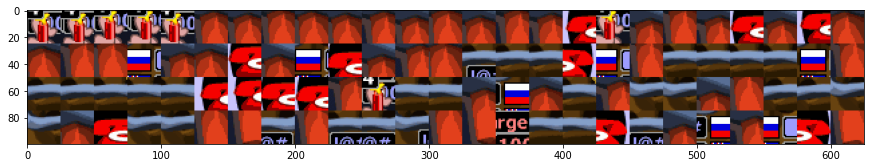

In [12]:
np.shape(topim)
plt.figure(figsize=(15,15))
plt.imshow(np.vstack([np.concatenate(topim[i:i+25], axis=1) for i in range(0, len(topim), 25)]))

In [13]:
np.array(rr)[top]

/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_25015/3998133665.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.array(rr)[top]
/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_25015/3998133665.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(rr)[top]


array([tensor([[2.9363]]), tensor([[2.5883]]), tensor([[2.4387]]),
       tensor([[2.4179]]), tensor([[2.0123]]), tensor([[0.0118]]),
       tensor([[-0.0687]]), tensor([[-0.1714]]), tensor([[-0.1925]]),
       tensor([[-0.2048]]), tensor([[-0.2864]]), tensor([[-0.2960]]),
       tensor([[-0.3748]]), tensor([[-0.3957]]), tensor([[-0.4078]]),
       tensor([[-0.4743]]), tensor([[-0.5853]]), tensor([[-0.6003]]),
       tensor([[-0.6214]]), tensor([[-0.6592]]), tensor([[-0.6618]]),
       tensor([[-0.7222]]), tensor([[-0.7493]]), tensor([[-0.7928]]),
       tensor([[-0.7966]]), tensor([[-0.8252]]), tensor([[-0.8681]]),
       tensor([[-0.8865]]), tensor([[-0.8933]]), tensor([[-0.9229]]),
       tensor([[-0.9289]]), tensor([[-0.9359]]), tensor([[-0.9378]]),
       tensor([[-0.9933]]), tensor([[-0.9993]]), tensor([[-1.0009]]),
       tensor([[-1.0167]]), tensor([[-1.0329]]), tensor([[-1.0375]]),
       tensor([[-1.0540]]), tensor([[-1.0540]]), tensor([[-1.0587]]),
       tensor([[-1.0887]])

In [14]:
np.diff(sorted(np.array(rr)[top], reverse=True))

/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_25015/3005372722.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.diff(sorted(np.array(rr)[top], reverse=True))
/var/folders/m6/kfz4y9f951b7p__cw111wtww0000gn/T/ipykernel_25015/3005372722.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.diff(sorted(np.array(rr)[top], reverse=True))
/opt/homebrew/

array([tensor([[-0.3480]]), tensor([[-0.1496]]), tensor([[-0.0208]]),
       tensor([[-0.4056]]), tensor([[-2.0006]]), tensor([[-0.0805]]),
       tensor([[-0.1026]]), tensor([[-0.0211]]), tensor([[-0.0123]]),
       tensor([[-0.0816]]), tensor([[-0.0097]]), tensor([[-0.0788]]),
       tensor([[-0.0208]]), tensor([[-0.0122]]), tensor([[-0.0665]]),
       tensor([[-0.1110]]), tensor([[-0.0150]]), tensor([[-0.0211]]),
       tensor([[-0.0378]]), tensor([[-0.0025]]), tensor([[-0.0604]]),
       tensor([[-0.0271]]), tensor([[-0.0435]]), tensor([[-0.0038]]),
       tensor([[-0.0286]]), tensor([[-0.0429]]), tensor([[-0.0183]]),
       tensor([[-0.0068]]), tensor([[-0.0296]]), tensor([[-0.0061]]),
       tensor([[-0.0069]]), tensor([[-0.0019]]), tensor([[-0.0555]]),
       tensor([[-0.0060]]), tensor([[-0.0017]]), tensor([[-0.0157]]),
       tensor([[-0.0162]]), tensor([[-0.0046]]), tensor([[-0.0165]]),
       tensor([[0.]]), tensor([[-0.0047]]), tensor([[-0.0299]]),
       tensor([[-0.0156]]